Cargamos la base de datos en formato JSON

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np    

In [2]:
with open('datasets/raw/eval_route_data_formatted.json',"r") as eval_route:
    data_eval_route = json.load(eval_route)

In [3]:
data_eval_route_origin = pd.DataFrame(data_eval_route)
data_eval_route_origin = data_eval_route_origin.transpose()
data_eval_route_origin = data_eval_route_origin.rename_axis('route_id').reset_index()


In [4]:
# columnas donde quiero remover caracteres:
columnas = ['route_id']
data_eval_route_origin[columnas] = data_eval_route_origin[columnas].replace({'RouteID_':''}, regex=True)
data_eval_route_origin.head()

,route_id,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,stops
0,00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,"{'AH': {'lat': 33.88548, 'lng': -118.344553, '..."
1,00337a3a-19c6-4821-9350-ad3cf0532047,DLA4,2018-09-03,14:48:09,3313071.0,"{'AI': {'lat': 34.23485, 'lng': -118.58421, 't..."
2,0034b931-97a7-485f-a6b3-b22798489094,DLA4,2018-09-19,15:00:43,3313071.0,"{'AC': {'lat': 34.445781, 'lng': -118.547663, ..."
3,0085d8a2-71a3-4205-9c46-e62139eca47b,DSE4,2018-07-02,15:18:39,3539605.75,"{'AA': {'lat': 47.843277, 'lng': -122.227138, ..."
4,008bf177-673c-4647-89dd-bf8c13b7c51d,DLA3,2018-07-11,15:30:00,3313071.0,"{'AH': {'lat': 34.070819, 'lng': -118.27768, '..."


### 4.1. Analisis Exploratorio

In [5]:
data_eval_route_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   route_id               3052 non-null   object
 1   station_code           3052 non-null   object
 2   date_YYYY_MM_DD        3052 non-null   object
 3   departure_time_utc     3052 non-null   object
 4   executor_capacity_cm3  3052 non-null   object
 5   stops                  3052 non-null   object
dtypes: object(6)
memory usage: 143.2+ KB


#### 4.1.1 Numerical

In [6]:
numericas = [x for x in list(data_eval_route_origin.columns) if (pd.api.types.is_integer_dtype(data_eval_route_origin[x]))]
print(numericas)

[]


#### 4.1.1 Categorical

In [7]:
categoricas = [x for x in list(data_eval_route_origin.columns) if (x not in numericas)]
print(categoricas)

['route_id', 'station_code', 'date_YYYY_MM_DD', 'departure_time_utc', 'executor_capacity_cm3', 'stops']


#### 4.2 Aggregation

Obtenemos todas las keys de los Route_ID

In [8]:
def obtener_todas_las_claves(objeto_json):
    claves = []
    if isinstance(objeto_json, dict):
        for clave, valor in objeto_json.items():
            claves.append(clave)
    return claves
claves = obtener_todas_las_claves(data_eval_route)
claves = list(set(claves))

In [9]:
print(claves)

['RouteID_fbaa388c-8707-4a32-96ea-1f98f65f5034', 'RouteID_0dc8b037-49fd-476a-bc64-c5f816b802a6', 'RouteID_4dcf081f-ac8d-46ff-895f-330e66f272d6', 'RouteID_581661d4-bea8-47eb-a9a8-83c649427aef', 'RouteID_eda6f1b7-21f9-40d3-985f-eecafcf0cdcb', 'RouteID_956fbcc2-313a-45c9-8e45-2417d10ce62b', 'RouteID_09845bde-1546-4cf0-88ec-93b66c49c0b1', 'RouteID_582d9a35-30a9-41e8-9fd6-4ea6b6e9a97e', 'RouteID_46ba0ae6-fded-4c82-998d-174cc796a34d', 'RouteID_8d08b914-30f5-41bc-989a-59e5a0fd888e', 'RouteID_52dcbde3-b898-4dce-946c-16a114092e69', 'RouteID_1bedd007-f98e-4b8c-a0c5-321adc94954b', 'RouteID_205b6521-6183-4027-af13-997700628939', 'RouteID_b7acd162-c695-4c8f-a4af-b8761f124dd5', 'RouteID_e5c4008b-eeae-44d5-b7d6-3155965a27d0', 'RouteID_c0e618eb-fc3f-49d5-95bf-e12e21b079ca', 'RouteID_7e05cfcc-3039-44fa-995b-b9b3c5caa609', 'RouteID_6934df1d-cd39-4b1d-aafe-aa071c8b1fdd', 'RouteID_8f916b85-4147-4c3e-a8f8-9c50b776d7c3', 'RouteID_7753d516-82f5-4f97-97d4-21b2438df4d5', 'RouteID_1903b701-6b2f-4934-a722-de9491

Encontramos todas las keys de las paradas

In [10]:
list_stops=[]
for clave in claves:
    for st in data_eval_route[clave]["stops"]:
        if st not in list_stops:
            list_stops.append(st)

In [11]:
print(list_stops)

['AJ', 'AQ', 'AV', 'BJ', 'BL', 'BR', 'BS', 'BV', 'CG', 'CK', 'CN', 'CT', 'CY', 'DG', 'DI', 'DK', 'DR', 'EG', 'EJ', 'EY', 'FE', 'FF', 'FT', 'FU', 'IB', 'IE', 'IS', 'IU', 'IZ', 'JM', 'JP', 'JQ', 'KA', 'KD', 'KK', 'KR', 'LB', 'LK', 'LO', 'LS', 'MH', 'MO', 'NQ', 'OD', 'OG', 'OQ', 'PQ', 'PR', 'PT', 'PY', 'QB', 'QI', 'QS', 'QV', 'RA', 'RF', 'RG', 'RX', 'SB', 'SD', 'SZ', 'TD', 'TK', 'TO', 'TR', 'TY', 'UF', 'UH', 'UL', 'UP', 'UR', 'US', 'VD', 'VG', 'VQ', 'VW', 'WA', 'WF', 'XD', 'XR', 'YD', 'YI', 'YN', 'YQ', 'YT', 'YV', 'YZ', 'ZG', 'ZK', 'ZR', 'ZT', 'AB', 'AE', 'AH', 'AW', 'AX', 'BK', 'BM', 'BZ', 'CA', 'CB', 'CM', 'CX', 'CZ', 'DA', 'DB', 'DC', 'DN', 'DU', 'DW', 'DX', 'EH', 'EK', 'EL', 'ET', 'FQ', 'FS', 'GL', 'GX', 'HA', 'HH', 'HM', 'HO', 'HQ', 'HU', 'HY', 'IA', 'IG', 'IL', 'JA', 'JH', 'JR', 'JT', 'KC', 'KG', 'KJ', 'KL', 'KP', 'KT', 'LL', 'LP', 'LR', 'MC', 'MJ', 'MS', 'MT', 'NB', 'NE', 'NJ', 'NK', 'NP', 'NS', 'NT', 'NW', 'OB', 'OF', 'OK', 'OV', 'PJ', 'PK', 'PN', 'PV', 'QC', 'QD', 'QM', 'QO', 'QQ

Creamos un nuevo JSON donde cada parada es asignada con un tag 0 para inexistente, 1 para Dropoff y 2 para Station. Se elimina el diccionario "stops"

In [12]:
processed = dict([])
for clave in claves:
    toADD = data_eval_route[clave]
    toADD['RouteID'] = str(clave).replace("RouteID_","")
    for stop in list_stops:
        if stop in toADD["stops"]:
            toADD[stop] = "1" if toADD["stops"][stop]['type'] == 'Dropoff' else "2"
            toADD['Zone'] = str(data_eval_route[clave]['stops'][stop]['zone_id']).split('-')[0]
        else:
            toADD[stop] = "0"
        if toADD[stop] == "2" and toADD["stops"][stop]['type'] != "Station":
            print(toADD["stops"][stop]['type']) ##Verificamos si hay valores nulos
            
    del toADD['stops']
    processed[str(len(processed))] = toADD

Escribimos el diccionario resultante

In [13]:
with open('datasets/processed/eval_route_data_formatted.json', 'w') as file:
    json.dump(processed, file, indent=4)

In [14]:
df_eval_route = pd.DataFrame.from_dict(processed, orient='index')

In [15]:
df_eval_route

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,RouteID,AJ,Zone,AQ,AV,BJ,...,NA,QU,YE,XW,GQ,WP,YY,DF,OZ,GB
0,DSE2,2018-06-28,14:19:54,3539605.75,fbaa388c-8707-4a32-96ea-1f98f65f5034,1,C,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DLA4,2018-06-08,13:45:00,3539605.75,0dc8b037-49fd-476a-bc64-c5f816b802a6,0,G,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,DLA9,2018-06-03,15:29:14,3539605.75,4dcf081f-ac8d-46ff-895f-330e66f272d6,0,D,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DLA7,2018-06-23,15:02:44,3539605.75,581661d4-bea8-47eb-a9a8-83c649427aef,0,H,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DLA4,2018-09-03,13:59:18,3313071.00,eda6f1b7-21f9-40d3-985f-eecafcf0cdcb,0,A,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,DBO3,2018-09-04,12:21:20,3313071.00,02eda10d-7325-4bed-be59-0419cc8a0554,0,E,0,0,0,...,0,2,0,0,1,0,0,0,0,0
3048,DLA8,2018-09-08,15:39:15,4247527.00,2748d20e-e775-45f6-ae52-70ca101785e7,0,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3049,DLA8,2018-06-29,15:04:48,3539605.75,b1a821b8-c1b8-4d96-9722-a11fb19809ff,0,A,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3050,DBO1,2018-06-19,12:18:24,3539605.75,5fcfd10c-f9f5-4fcb-8bed-755f6265246c,0,None,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### 4.2.1 Analisis Exploratorio Dataframe Aggregation

#### Missing Values

In [16]:
df_eval_route.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3052 entries, 0 to 3051
Columns: 681 entries, station_code to GB
dtypes: float64(1), object(680)
memory usage: 15.9+ MB


#### Duplicate Data

In [17]:
dups = df_eval_route.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### 4.2.1.1 Numerical

In [18]:
numericas = [x for x in list(df_eval_route.columns) if (pd.api.types.is_float_dtype(df_eval_route[x]))]
print(numericas)

['executor_capacity_cm3']


In [19]:
for x in numericas:
  print( "Varianza {}: ".format(x), np.var(df_eval_route[x]))

Varianza executor_capacity_cm3:  236179089238.42145


In [20]:
df_eval_route.describe()

,executor_capacity_cm3
count,3.052000e+03
mean,3.670335e+06
std,4.860622e+05
min,3.114853e+06
25%,3.313071e+06
50%,3.539606e+06
75%,4.247527e+06
max,4.672280e+06


#### Outliers

In [21]:
df_eval_route['executor_capacity_cm3'] = df_eval_route['executor_capacity_cm3'].astype(float, errors = 'raise')

In [22]:
routes = (
    df_eval_route.groupby(["station_code","date_YYYY_MM_DD"])[["executor_capacity_cm3"]]
    .agg("sum")
    .reset_index()
)

In [23]:
routes.sort_values(by=['executor_capacity_cm3'], ascending=False)[0:10]

,station_code,date_YYYY_MM_DD,executor_capacity_cm3
853,DLA9,2018-09-15,86366381.25
854,DLA9,2018-09-16,49186362.00
658,DLA7,2018-07-05,46014874.75
662,DLA7,2018-07-09,46014874.75
861,DLA9,2018-09-23,44004379.00
833,DLA9,2018-07-19,44004379.00
846,DLA9,2018-09-08,42560220.00
629,DLA7,2018-06-02,42475269.00
657,DLA7,2018-07-03,42475269.00
739,DLA8,2018-07-05,42475269.00


In [24]:
df_executor_capacity_positive = df_eval_route[df_eval_route["executor_capacity_cm3"]>0]

threshold = 5000000
df_executor_capacity_positive = df_executor_capacity_positive[
    df_executor_capacity_positive["executor_capacity_cm3"] <= threshold
]

c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='executor_capacity_cm3'>

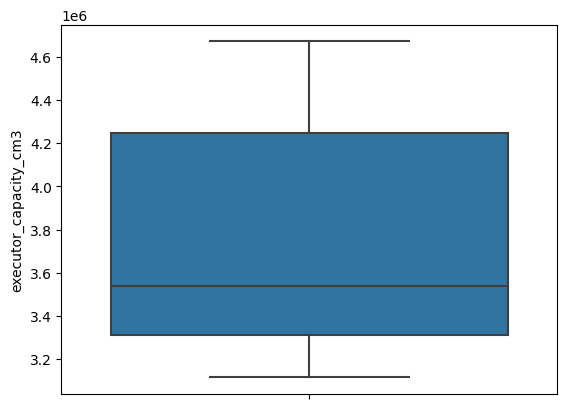

In [25]:
sns.boxplot(y=df_executor_capacity_positive["executor_capacity_cm3"])

In [26]:
df_executor_capacity_positive["executor_capacity_cm3"].quantile([.25, .5, 0.75, 0.95])

0.25    3313071.00
0.50    3539605.75
0.75    4247527.00
0.95    4672279.50
Name: executor_capacity_cm3, dtype: float64

#### Medidas de Dispersión

##### Media

In [27]:
print('----------------------')
print('Media de cada "executor_capacity_cm3"')
df_eval_route['executor_capacity_cm3'].mean(axis=0)

----------------------
Media de cada "executor_capacity_cm3"


3670334.5918250326

##### Varianza

In [28]:
print('-------------------------')
print('Varianza de "executor_capacity_cm3"')
print('-------------------------')
df_eval_route['executor_capacity_cm3'].var(axis=0)

-------------------------
Varianza de "executor_capacity_cm3"
-------------------------


236256499624.93027

##### Desvición Estandar

In [29]:
# Desviacion estandard
df_executor_capacity_positive["executor_capacity_cm3"].std()

486062.23842727207

##### Valores MAX/MIN

In [30]:
print("Executor Capacity MIN: ",min(df_eval_route['executor_capacity_cm3']))


Executor Capacity MIN:  3114853.25


In [31]:
print("Executor Capacity MAX: ",max(df_eval_route['executor_capacity_cm3']))

Executor Capacity MAX:  4672279.5


#### 4.2.1.2 Categorical

In [32]:
categoricas = [x for x in list(df_eval_route.columns) if (x not in numericas)]
print(categoricas)

['station_code', 'date_YYYY_MM_DD', 'departure_time_utc', 'RouteID', 'AJ', 'Zone', 'AQ', 'AV', 'BJ', 'BL', 'BR', 'BS', 'BV', 'CG', 'CK', 'CN', 'CT', 'CY', 'DG', 'DI', 'DK', 'DR', 'EG', 'EJ', 'EY', 'FE', 'FF', 'FT', 'FU', 'IB', 'IE', 'IS', 'IU', 'IZ', 'JM', 'JP', 'JQ', 'KA', 'KD', 'KK', 'KR', 'LB', 'LK', 'LO', 'LS', 'MH', 'MO', 'NQ', 'OD', 'OG', 'OQ', 'PQ', 'PR', 'PT', 'PY', 'QB', 'QI', 'QS', 'QV', 'RA', 'RF', 'RG', 'RX', 'SB', 'SD', 'SZ', 'TD', 'TK', 'TO', 'TR', 'TY', 'UF', 'UH', 'UL', 'UP', 'UR', 'US', 'VD', 'VG', 'VQ', 'VW', 'WA', 'WF', 'XD', 'XR', 'YD', 'YI', 'YN', 'YQ', 'YT', 'YV', 'YZ', 'ZG', 'ZK', 'ZR', 'ZT', 'AB', 'AE', 'AH', 'AW', 'AX', 'BK', 'BM', 'BZ', 'CA', 'CB', 'CM', 'CX', 'CZ', 'DA', 'DB', 'DC', 'DN', 'DU', 'DW', 'DX', 'EH', 'EK', 'EL', 'ET', 'FQ', 'FS', 'GL', 'GX', 'HA', 'HH', 'HM', 'HO', 'HQ', 'HU', 'HY', 'IA', 'IG', 'IL', 'JA', 'JH', 'JR', 'JT', 'KC', 'KG', 'KJ', 'KL', 'KP', 'KT', 'LL', 'LP', 'LR', 'MC', 'MJ', 'MS', 'MT', 'NB', 'NE', 'NJ', 'NK', 'NP', 'NS', 'NT', 'NW',

In [33]:
df_eval_route_categorical = df_eval_route.columns.tolist()

In [34]:
df_eval_route_categorical.remove('executor_capacity_cm3')

In [35]:
df_eval_route_numerical = ["executor_capacity_cm3"]

In [36]:
df_eval_route.count()

station_code             3052
date_YYYY_MM_DD          3052
departure_time_utc       3052
executor_capacity_cm3    3052
RouteID                  3052
                         ... 
WP                       3052
YY                       3052
DF                       3052
OZ                       3052
GB                       3052
Length: 681, dtype: int64

In [37]:
for c in df_eval_route_categorical:
  print(c)
  print(df_eval_route[c].unique())
  print(df_eval_route[c].nunique())
  print('\n')

station_code
['DSE2' 'DLA4' 'DLA9' 'DLA7' 'DLA8' 'DBO3' 'DCH1' 'DSE5' 'DLA5' 'DCH4'
 'DLA3' 'DBO1' 'DBO2' 'DCH3' 'DSE4' 'DCH2' 'DAU1' 'DBO6']
18


date_YYYY_MM_DD
['2018-06-28' '2018-06-08' '2018-06-03' '2018-06-23' '2018-09-03'
 '2018-08-31' '2018-07-08' '2018-09-21' '2018-10-02' '2018-06-26'
 '2018-07-06' '2018-09-07' '2018-06-24' '2018-07-16' '2018-08-30'
 '2018-06-05' '2018-08-27' '2018-07-17' '2018-06-27' '2018-09-28'
 '2018-09-15' '2018-09-22' '2018-09-25' '2018-06-30' '2018-09-06'
 '2018-07-07' '2018-08-29' '2018-09-24' '2018-09-04' '2018-09-16'
 '2018-09-29' '2018-07-03' '2018-06-16' '2018-09-26' '2018-09-12'
 '2018-08-28' '2018-06-22' '2018-06-14' '2018-07-12' '2018-09-30'
 '2018-09-01' '2018-06-02' '2018-06-17' '2018-06-12' '2018-06-15'
 '2018-07-15' '2018-09-02' '2018-09-13' '2018-06-10' '2018-09-05'
 '2018-09-09' '2018-09-20' '2018-06-19' '2018-07-09' '2018-10-01'
 '2018-07-05' '2018-06-18' '2018-06-11' '2018-09-14' '2018-07-14'
 '2018-07-01' '2018-09-11' '2018-06-25' '2018

In [38]:
for c in df_eval_route_categorical:
  print(df_eval_route[c].value_counts())
  print('\n')

station_code
DLA9    496
DLA7    397
DLA8    353
DBO3    202
DSE4    166
DCH3    161
DLA4    157
DBO2    152
DSE5    143
DLA3    129
DCH1    123
DAU1    121
DSE2    114
DCH4    113
DLA5     94
DCH2     71
DBO1     59
DBO6      1
Name: count, dtype: int64


date_YYYY_MM_DD
2018-07-03    80
2018-09-29    72
2018-09-15    68
2018-07-05    66
2018-10-02    64
              ..
2018-06-11    20
2018-06-04    19
2018-06-18    19
2018-08-27    15
2018-06-25    15
Name: count, Length: 85, dtype: int64


departure_time_utc
15:00:00    91
15:30:00    69
13:45:00    63
16:15:00    49
16:00:00    48
            ..
13:31:16     1
15:27:16     1
13:55:21     1
15:08:17     1
15:35:24     1
Name: count, Length: 2359, dtype: int64


RouteID
fbaa388c-8707-4a32-96ea-1f98f65f5034    1
a6c58c75-6c3c-4e8a-9f97-c476e4993b68    1
169029a9-d884-4e49-8a98-458b1ee46b66    1
087c434f-8b0e-4e89-83b0-0ce81a56029b    1
abafac82-8e72-4016-8906-7ae75e8aabbb    1
                                       ..
1f7ec7b9-9de5-

In [39]:
for c in df_eval_route_categorical:
  print(df_eval_route[c].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
  print('\n')

station_code
DLA9    16.3%
DLA7    13.0%
DLA8    11.6%
DBO3     6.6%
DSE4     5.4%
DCH3     5.3%
DLA4     5.1%
DBO2     5.0%
DSE5     4.7%
DLA3     4.2%
DCH1     4.0%
DAU1     4.0%
DSE2     3.7%
DCH4     3.7%
DLA5     3.1%
DCH2     2.3%
DBO1     1.9%
DBO6     0.0%
Name: proportion, dtype: object


date_YYYY_MM_DD
2018-07-03    2.6%
2018-09-29    2.4%
2018-09-15    2.2%
2018-07-05    2.2%
2018-10-02    2.1%
              ... 
2018-06-11    0.7%
2018-06-04    0.6%
2018-06-18    0.6%
2018-08-27    0.5%
2018-06-25    0.5%
Name: proportion, Length: 85, dtype: object


departure_time_utc
15:00:00    3.0%
15:30:00    2.3%
13:45:00    2.1%
16:15:00    1.6%
16:00:00    1.6%
            ... 
13:31:16    0.0%
15:27:16    0.0%
13:55:21    0.0%
15:08:17    0.0%
15:35:24    0.0%
Name: proportion, Length: 2359, dtype: object


RouteID
fbaa388c-8707-4a32-96ea-1f98f65f5034    0.0%
a6c58c75-6c3c-4e8a-9f97-c476e4993b68    0.0%
169029a9-d884-4e49-8a98-458b1ee46b66    0.0%
087c434f-8b0e-4e89-83b0-0ce81a560

YD
0    80.6%
1    19.3%
2     0.1%
Name: proportion, dtype: object


YI
0    79.5%
1    19.9%
2     0.6%
Name: proportion, dtype: object


YN
0    78.4%
1    21.6%
Name: proportion, dtype: object


YQ
0    82.4%
1    17.6%
2     0.0%
Name: proportion, dtype: object


YT
0    78.9%
1    20.9%
2     0.2%
Name: proportion, dtype: object


YV
0    77.8%
1    21.9%
2     0.3%
Name: proportion, dtype: object


YZ
0    78.6%
1    21.2%
2     0.2%
Name: proportion, dtype: object


ZG
0    79.3%
1    20.3%
2     0.4%
Name: proportion, dtype: object


ZK
0    79.0%
1    20.9%
2     0.1%
Name: proportion, dtype: object


ZR
0    79.9%
1    19.9%
2     0.2%
Name: proportion, dtype: object


ZT
0    77.7%
1    22.3%
Name: proportion, dtype: object


AB
0    79.9%
1    20.1%
2     0.0%
Name: proportion, dtype: object


AE
0    76.2%
1    23.7%
2     0.1%
Name: proportion, dtype: object


AH
0    76.0%
1    24.0%
2     0.1%
Name: proportion, dtype: object


AW
0    79.5%
1    20.5%
Name: proportion,

### 4.3 Sampling

In [40]:
df_eval_route.head()

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,RouteID,AJ,Zone,AQ,AV,BJ,...,NA,QU,YE,XW,GQ,WP,YY,DF,OZ,GB
0,DSE2,2018-06-28,14:19:54,3539605.75,fbaa388c-8707-4a32-96ea-1f98f65f5034,1,C,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DLA4,2018-06-08,13:45:00,3539605.75,0dc8b037-49fd-476a-bc64-c5f816b802a6,0,G,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,DLA9,2018-06-03,15:29:14,3539605.75,4dcf081f-ac8d-46ff-895f-330e66f272d6,0,D,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DLA7,2018-06-23,15:02:44,3539605.75,581661d4-bea8-47eb-a9a8-83c649427aef,0,H,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DLA4,2018-09-03,13:59:18,3313071.00,eda6f1b7-21f9-40d3-985f-eecafcf0cdcb,0,A,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
sample = df_eval_route.sample(frac=0.01, replace=True, random_state=1)
sample.info()
sample

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1061 to 1031
Columns: 681 entries, station_code to GB
dtypes: float64(1), object(680)
memory usage: 165.2+ KB


,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,RouteID,AJ,Zone,AQ,AV,BJ,...,NA,QU,YE,XW,GQ,WP,YY,DF,OZ,GB
1061,DLA9,2018-09-07,15:00:00,4247527.00,c56ee5f0-1f12-466f-a9ff-3843489a13b6,1,C,0,0,0,...,1,0,0,0,0,0,0,0,1,0
235,DLA7,2018-09-19,14:55:33,3313071.00,90e60b55-f98a-4fad-8aa5-cacdd4a6a253,0,A,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1096,DLA4,2018-07-11,15:15:00,3313071.00,16d54114-b33f-4d89-8980-6a1e5149ec19,1,C,0,0,1,...,0,0,0,1,0,0,1,0,0,0
905,DSE5,2018-07-10,14:36:04,4672279.50,11122fc9-f0f1-4cd4-b50e-cb3a459f72e0,0,A,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2763,DSE2,2018-09-28,14:19:59,3313071.00,d83a48a0-f3a7-400b-ab54-60466f8b7dab,0,C,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,DLA5,2018-09-15,15:10:58,3313071.00,ec6b8967-1241-4d31-8759-e730f9442dd3,1,B,0,0,0,...,0,0,0,1,0,1,0,0,1,0
960,DBO3,2018-09-26,12:15:00,4247527.00,7c71e063-859f-4813-8378-c53413bbea1a,0,J,1,0,0,...,0,1,1,0,1,0,0,0,0,0
144,DLA8,2018-07-05,14:45:24,3539605.75,612ff7e5-862f-445d-a948-4553f7188c65,0,A,0,0,0,...,0,0,0,0,0,0,0,1,1,0
129,DLA5,2018-09-20,14:30:00,3313071.00,46e3b3cd-0a61-4ec3-ae24-6e29bb2817c8,0,C,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2797,DLA7,2018-07-05,14:17:48,3539605.75,f0dde206-7225-4aa1-bc82-0535e4f3851d,0,D,0,0,0,...,0,1,0,1,0,0,0,0,0,0


### 4.4 Discretization

c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

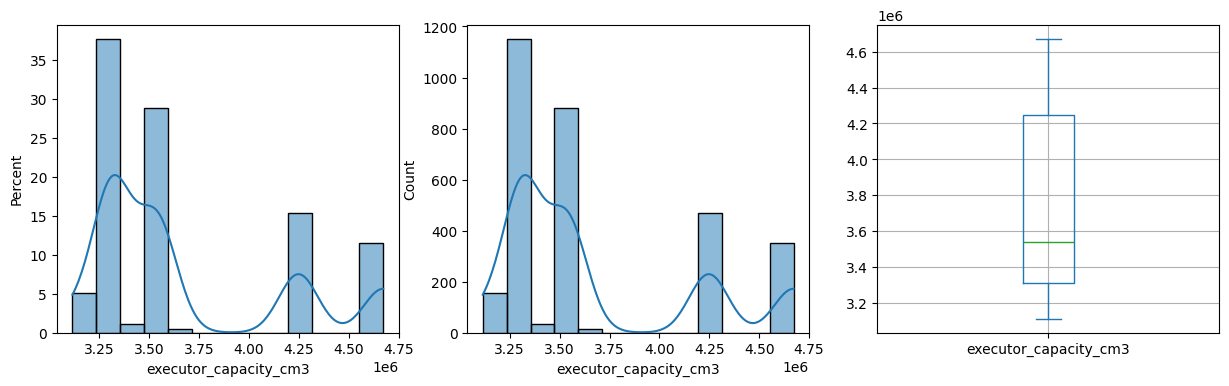

In [42]:
fig, ax1=plt.subplots(len(df_eval_route_numerical),3)
ax2 = ax1.ravel()

for i in list(range(0,len(df_eval_route_numerical)*3,3)):
  j=i+1
  k=j+1
  fig.set_figheight(4)
  fig.set_figwidth(15)
  plt.subplots_adjust(hspace=0.3)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[i],stat='percent')
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[j],pmax=1)
  df_eval_route[df_eval_route_numerical[i//3]].plot(kind='box',ax=ax2[k],grid=True)

c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tatys\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

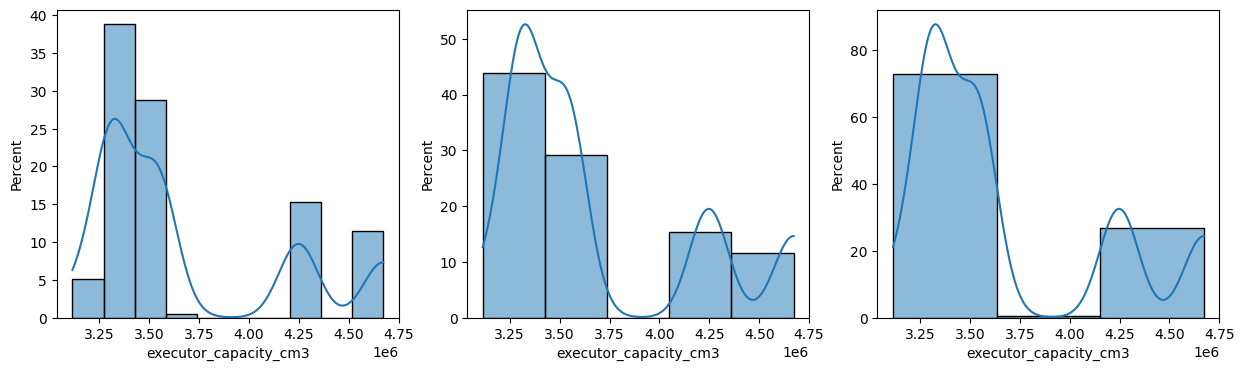

In [43]:
fig, ax1=plt.subplots(len(df_eval_route_numerical),3)
ax2 = ax1.ravel()
for i in list(range(0,len(df_eval_route_numerical)*3,3)):
  j=i+1
  k=j+1
  fig.set_figheight(4)
  fig.set_figwidth(15)
  plt.subplots_adjust(hspace=0.3)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[i],stat='percent',bins=10)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[j],stat='percent', bins=5)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[k],stat='percent', bins=3)

In [44]:
#with open('datasets/raw/eval_package_data_formatted.json',"r") as eval_package:
#    data_eval_package = json.load(eval_package)

In [45]:
#claves_package = obtener_todas_las_claves(data_eval_package)
#claves_package = list(set(claves_package))
#print(claves_package)

In [46]:
#processed = dict([])
#for clave in claves_package:
    #ruta = data_eval_package[clave]
    #claves_paradas = obtener_todas_las_claves(ruta)
    #for parada in claves_paradas:
        #claves_paquetes = obtener_todas_las_claves(ruta[parada])
        #toADD = dict([])
        #for paquete in claves_paquetes:
            #toADD['RouteID'] = str(clave).replace("RouteID_","")
            #toADD['stop'] = str(parada)
            #toADD['PackageID'] = str(paquete).replace("PackageID_","")
            #toADD['start_time'] = str(ruta[parada][paquete]['time_window']['start_time_utc'])
            #toADD['end_time'] = str(ruta[parada][paquete]['time_window']['end_time_utc'])
            #toADD['planned_service_time_seconds'] = str(ruta[parada][paquete]['planned_service_time_seconds'])
            #toADD['depth_cm'] = str(ruta[parada][paquete]['dimensions']['depth_cm'])
            #toADD['height_cm'] = str(ruta[parada][paquete]['dimensions']['height_cm'])
            #toADD['width_cm'] = str(ruta[parada][paquete]['dimensions']['width_cm'])
            #processed[str(len(processed))] = toADD
            #toADD = dict([])
            
#print(processed)

In [47]:
#with open('datasets/processed/eval_package_data_formatted.json', 'w') as file:
   # json.dump(processed, file, indent=4)

In [48]:
#df_eval_package = pd.DataFrame.from_dict(processed, orient='index')

In [49]:
#df_eval_package.head()

In [50]:
#with open('datasets/raw/eval_travel_times_formatted.json', "r") as eval_travel_times:
#data_eval_travel_times = json.load(eval_travel_times)
#claves_eval_travel_times = obtener_todas_las_claves(data_eval_travel_times)
#claves_eval_travel_times = list(set(claves_eval_travel_times))
#print(claves_eval_travel_times)

In [51]:
#processed = dict([])
#for clave in claves_eval_travel_times:
 #   ruta = data_eval_travel_times[clave]
 #   claves_paradas = obtener_todas_las_claves(ruta)
 #   for parada in claves_paradas:
 #       claves_llegadas = obtener_todas_las_claves(ruta[parada])
 #       toADD = dict([])
 #       for llegada in claves_llegadas:
 #           toADD['RouteID'] = str(clave).replace("RouteID_","")
 #           toADD['salida'] = str(parada)
 #           toADD['llegada'] = str(llegada)
 #           toADD['travel_time'] = str(ruta[parada])
 #           processed[str(len(processed))] = toADD
 #           toADD = dict([])
            
#print(processed)